Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

AssertionError: 1

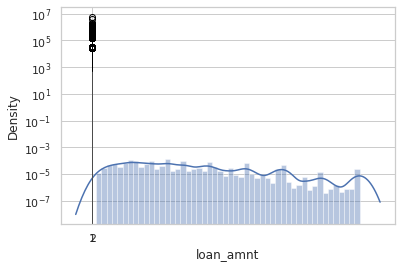

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

#Reading the csv file
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)


loan.shape

#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


loan.describe()



# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

# removing the columns having more than 60% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 60]
print(missing_columns)


#dropping the columns having more than 60% missing values
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)


# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))


#checking the data type of the columns in dataframe
loan.info()

# unique values
# We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis.
loan.nunique()

#removing all cloumns where number of unique values is 1
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)

        #Checking again if there are any cloumns left with less than 2 unique values
loan.nunique()

#removing columns which are not influencing our target variable i.e loan status. 
#here we are assuming that the columns representing customer behavior are not relevant w.r.t our analysis
loan = loan.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line'
                 ], axis = 1)

loan.shape

#removing all the rows where loan_status is "Current" as this is not relevant to our analysis
loan = loan[loan['loan_status']!= 'Current']

#checking the shape again
loan.shape


loan.isnull().sum()*100/loan.shape[0]


#replacing nan with NA in title and emp_title
loan["title"].fillna("NA", inplace=True)
loan["emp_title"].fillna("NA", inplace=True)


#dropping the rows where emp_length is nan as the % of missing values is very less 
loan = loan[~loan['emp_length'].isnull()]

#dropping the rows where home ownership is none as it has only 3 rows.
loan = loan[loan['home_ownership'] != 'NONE']

#checking the missing va.ues distribution again
loan.isnull().sum()*100/loan.shape[0]


loan.info()


#removing % and changing int rate to float
loan.int_rate=loan.int_rate.astype(str).str.rstrip('%').astype('float')

#converting columns to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

#converting issue date to date time
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

#checking distrbution of loan amount
sns.distplot(loan.loan_amnt)



#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);



plt.yscale('log')
loan.boxplot(column=['annual_inc','loan_amnt']);


loan.boxplot(column=['installment']);


loan.boxplot(column=['dti']);



#removing rows from annual_inc after 99.5 percentile
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.995)]
loan["annual_inc"].describe()


#removing rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()


# Purpose of loan
(loan.purpose.value_counts()*100)/len(loan)